### Regularisation and data augmentation for CNNs

### Overfitting in CNNs and Methods to Prevent It

Overfitting is a common issue in Convolutional Neural Networks (CNNs) due to the large number of parameters in deep architectures. Overfitting occurs when a model learns the training data too well, including its noise and outliers, resulting in poor generalization to new, unseen data.

#### Methods to Prevent Overfitting

- **Dropout**  
    Randomly sets a fraction of neurons to zero during training, which prevents co-adaptation of neurons. The dropout rate (e.g., 0.5) controls the proportion of neurons dropped. This technique forces the network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.

- **Batch Normalization**  
    Normalizes the input of each layer to stabilize and accelerate training. By reducing internal covariate shift, batch normalization allows for higher learning rates and can act as a regularizer, sometimes reducing the need for dropout.

- **Data Augmentation**  
    Artificially increases the size and diversity of the training dataset by applying random transformations to the input images. This helps the model generalize better by exposing it to a wider variety of data.

---

### Introduction to Data Augmentation Techniques

Data augmentation is essential for improving the robustness and generalization of CNNs, especially when the available dataset is limited.

**Common Techniques:**

- **Rotation:**  
    Rotates the image by a random angle within a specified range (e.g., -30° to +30°), helping the model become invariant to orientation.

- **Flipping:**  
    Horizontally or vertically flips the image. Horizontal flipping is commonly used for natural images, while vertical flipping may be used for specific domains.

- **Scaling:**  
    Resizes the image by zooming in or out. This helps the model recognize objects at different scales.

- **Cropping:**  
    Extracts random portions of the image, which encourages the model to focus on different parts of the object and improves robustness to object location.

- **Translation:**  
    Shifts the image along the x or y axis, making the model less sensitive to the position of objects within the frame.

- **Color Jittering:**  
    Randomly changes the brightness, contrast, saturation, or hue of the image, helping the model handle variations in lighting conditions.

---

### Why Use Both Regularization and Data Augmentation?

- **Regularization** (e.g., dropout, batch normalization) reduces the complexity of the model and prevents it from memorizing the training data.
- **Data Augmentation** increases the diversity of the training data, exposing the model to a broader range of scenarios and improving its ability to generalize to new data.

Combining these techniques leads to more robust and generalizable CNN models.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


load dataset

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

#normalise pixel values to the range [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True)

# fit the generator to training data
datagen.fit(X_train)

create model

Epoch 1/20


c:\Users\Cyrus\Documents\AI Mastery\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.3445 - loss: 2.1251 - val_accuracy: 0.5576 - val_loss: 1.2522
Epoch 2/20
  1/781 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.4531 - loss: 1.4046

c:\Users\Cyrus\Documents\AI Mastery\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4531 - loss: 1.4046 - val_accuracy: 0.5637 - val_loss: 1.2312
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.5330 - loss: 1.3021 - val_accuracy: 0.5885 - val_loss: 1.2672
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5312 - loss: 1.2959 - val_accuracy: 0.5890 - val_loss: 1.2712
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.5993 - loss: 1.1193 - val_accuracy: 0.5375 - val_loss: 1.4762
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7031 - loss: 0.9123 - val_accuracy: 0.5512 - val_loss: 1.3937
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6367 - loss: 1.0271 - val_accuracy: 0.6901 - val_loss: 0.8914
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7344 - loss: 0.8523 - val_accuracy: 0.6913 - val_loss: 0.8872
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.6579 - loss: 0.9706 - val_accuracy: 0.655

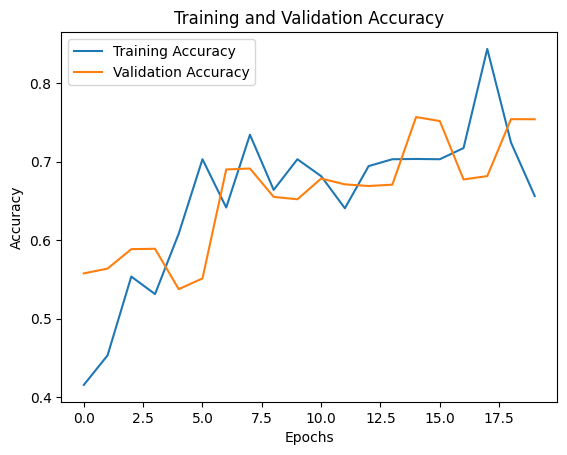

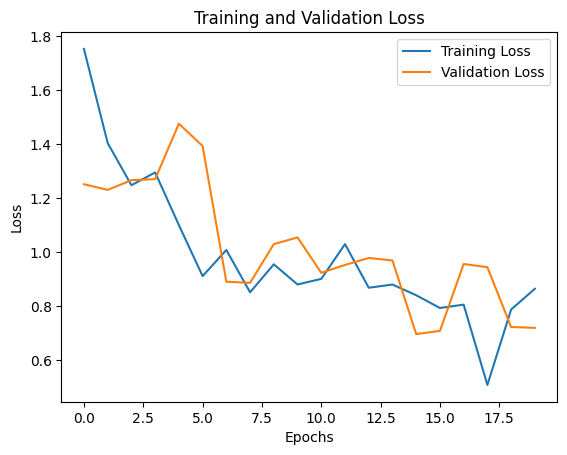

In [6]:
def create_model():
    model = models.Sequential()
    # convolutional layer 1
    model.add(layers.Input(shape=(32, 32, 3))),
    model.add(layers.Conv2D(32, (3, 3), activation="relu")),
    model.add(layers.BatchNormalization()),
    model.add(layers.Conv2D(32, (3, 3), activation="relu")),
    model.add(layers.BatchNormalization()),
    model.add(layers.MaxPooling2D((2, 2))),
    model.add(layers.Dropout(0.25)),
    # convolutional layer 2
    model.add(layers.Conv2D(64, (3, 3), activation="relu")),
    model.add(layers.BatchNormalization()),
    model.add(layers.Conv2D(64, (3, 3), activation="relu")),
    model.add(layers.BatchNormalization()),
    model.add(layers.MaxPooling2D((2, 2))),
    model.add(layers.Dropout(0.25)),

    # fully connected layers
    model.add(layers.Flatten()),
    model.add(layers.Dense(512, activation="relu")),
    model.add(layers.BatchNormalization()),
    model.add(layers.Dropout(0.5)),
    model.add(layers.Dense(10, activation="softmax"))

    return model


model = create_model()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# train the model using augmented data generator
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // 64,
)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()